## Problem Statement
 * NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
 * The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
 * Build a model to accurately predict whether the patients in the dataset have diabetes or not. Dataset Description
 
## Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 * Pregnancies: Number of times pregnant
 * Glucose: Plasma glucose concentration in an oral glucose tolerance test
 * BloodPressure: Diastolic blood pressure (mm Hg)
 * SkinThickness: Triceps skinfold thickness (mm)
 * Insulin: Two hour serum insulin
 * BMI: Body Mass Index
 * DiabetesPedigreeFunction: Diabetes pedigree function
 * Age: Age in years
 * Outcome: Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0
 
## Tasks:
## Data Exploration:
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
 * Glucose
 * BloodPressure
 * SkinThickness
 * Insulin
BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from imblearn.combine import SMOTETomek
from sklearn import preprocessing

## Loading data

In [2]:
df = pd.read_csv('health care diabetes.csv')

## Check data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Check Data Description

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visually explore these variables using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c413fbfd0>,
      dtype=object)

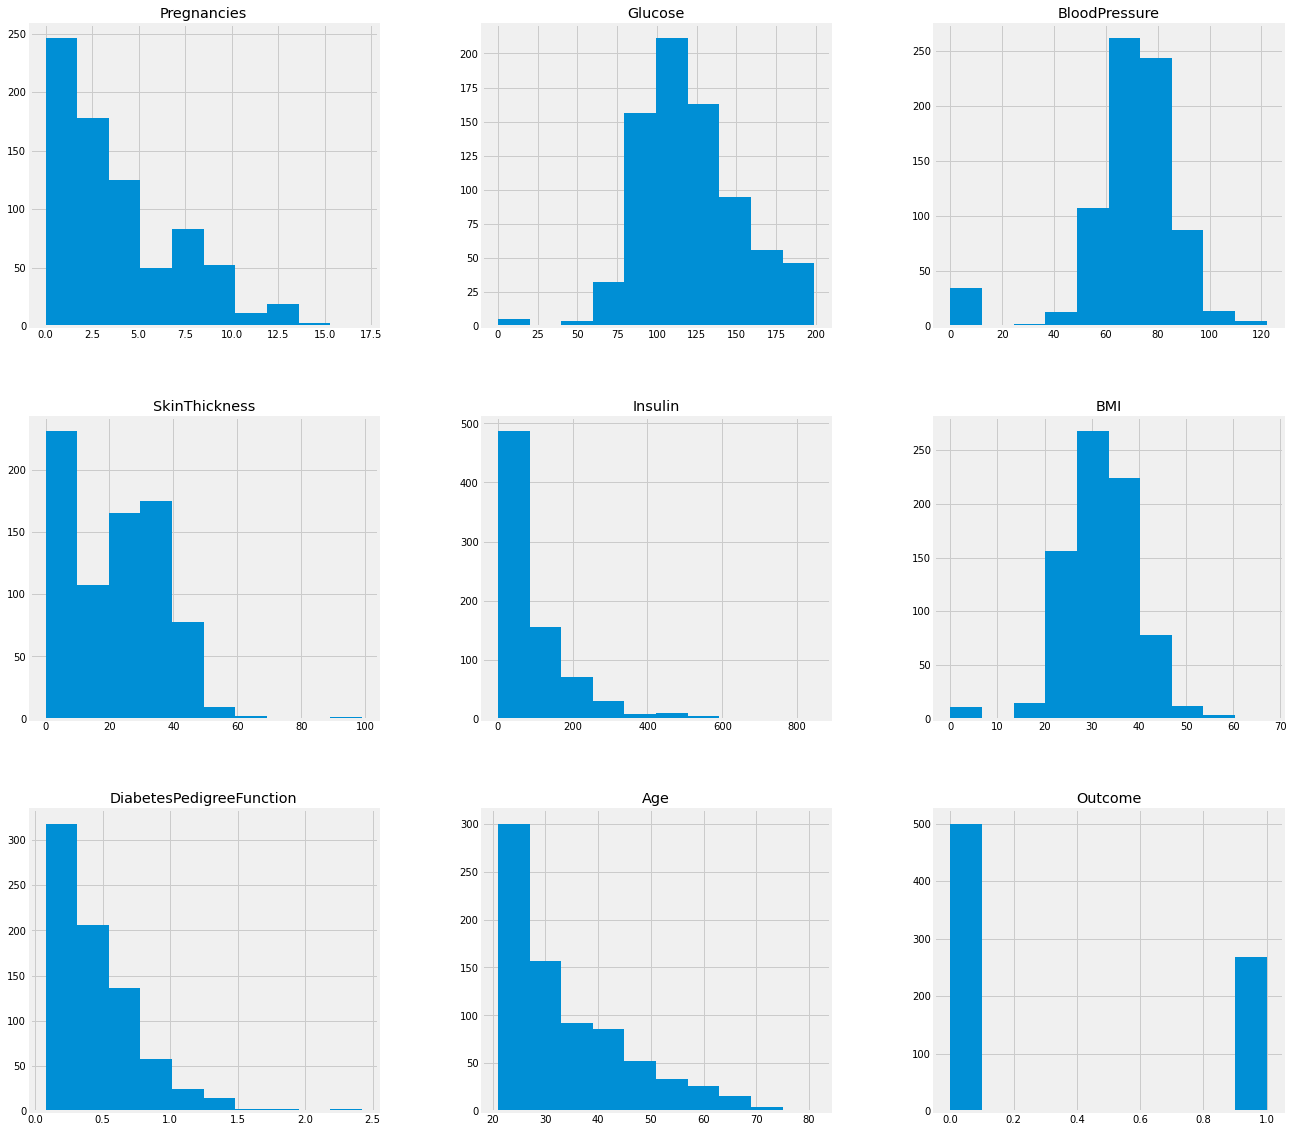

In [6]:
df.hist(figsize=(20,20), )

## Observation
* Regarding the description above , a value of zero does not make sense and thus indicates missing value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin BMI
* Dataset has only 2 data-type
1. Float
2. Integer

## Converting 0 to NAN

In [7]:
nan_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[nan_column] = df[nan_column].replace(0, np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Missing Values count

In [8]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Observations
* Missing Values are high for Insulin and SkinThikness.
* Missing Values are also found in BloodPressure, Glucose and BMI which are less comparitively to above 2.

## Plots before filling up the NAN Values

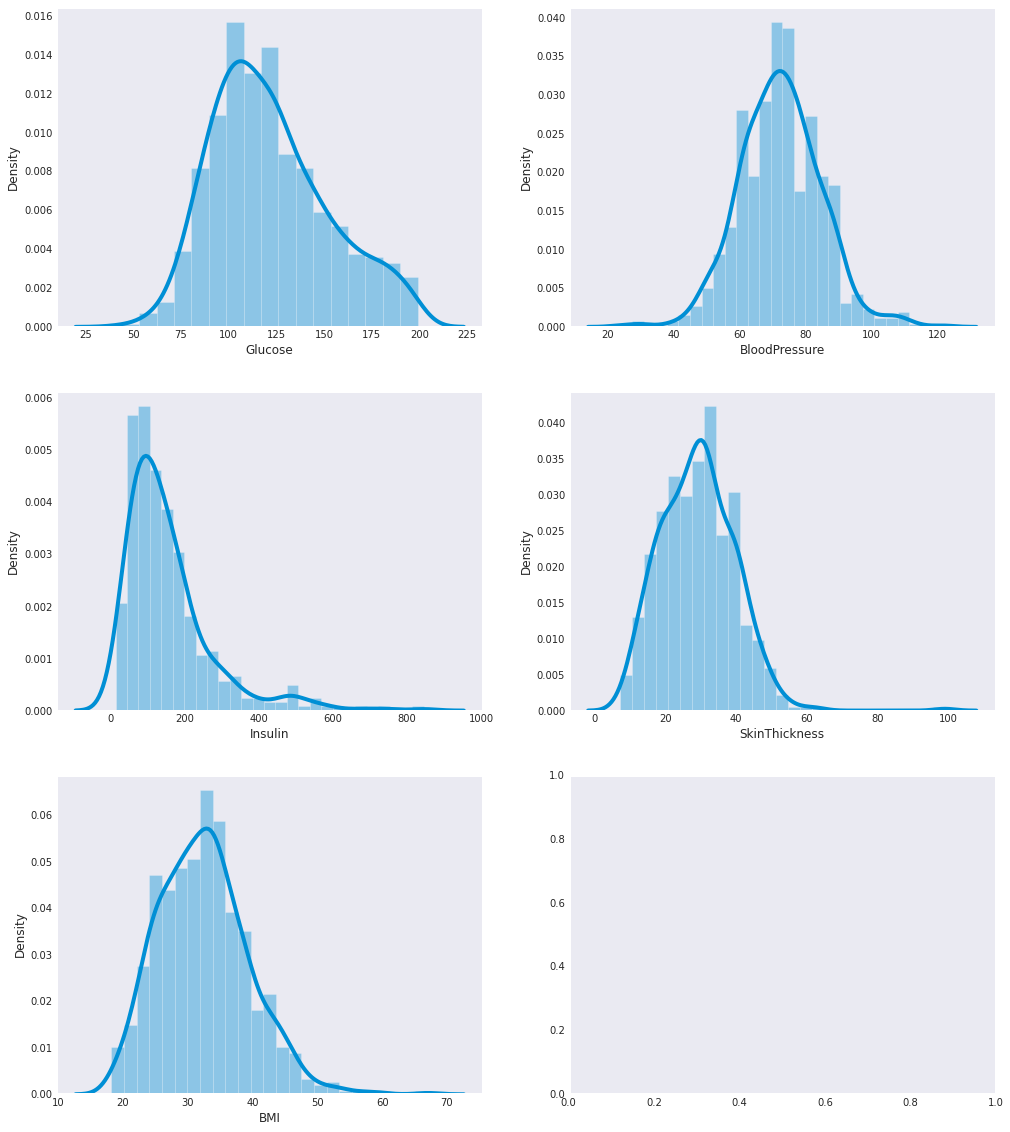

In [9]:
sns. set_style("dark")
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
sns.distplot(df.Glucose, ax=ax[0][0])
sns.distplot(df.BloodPressure, ax=ax[0][1])
sns.distplot(df.Insulin, ax=ax[1][0])
sns.distplot(df.SkinThickness, ax=ax[1][1])
sns.distplot(df.BMI, ax=ax[2][0])

## Treating Missing Values

In [10]:
#Imputing using Iterative Imputer
it_imput = IterativeImputer(max_iter=100)
iter_imp = it_imput.fit_transform(df)

#Creating imputed dataframe
df_eda = pd.DataFrame(iter_imp, columns=df.columns)

## Plots after filling up the NAN Values

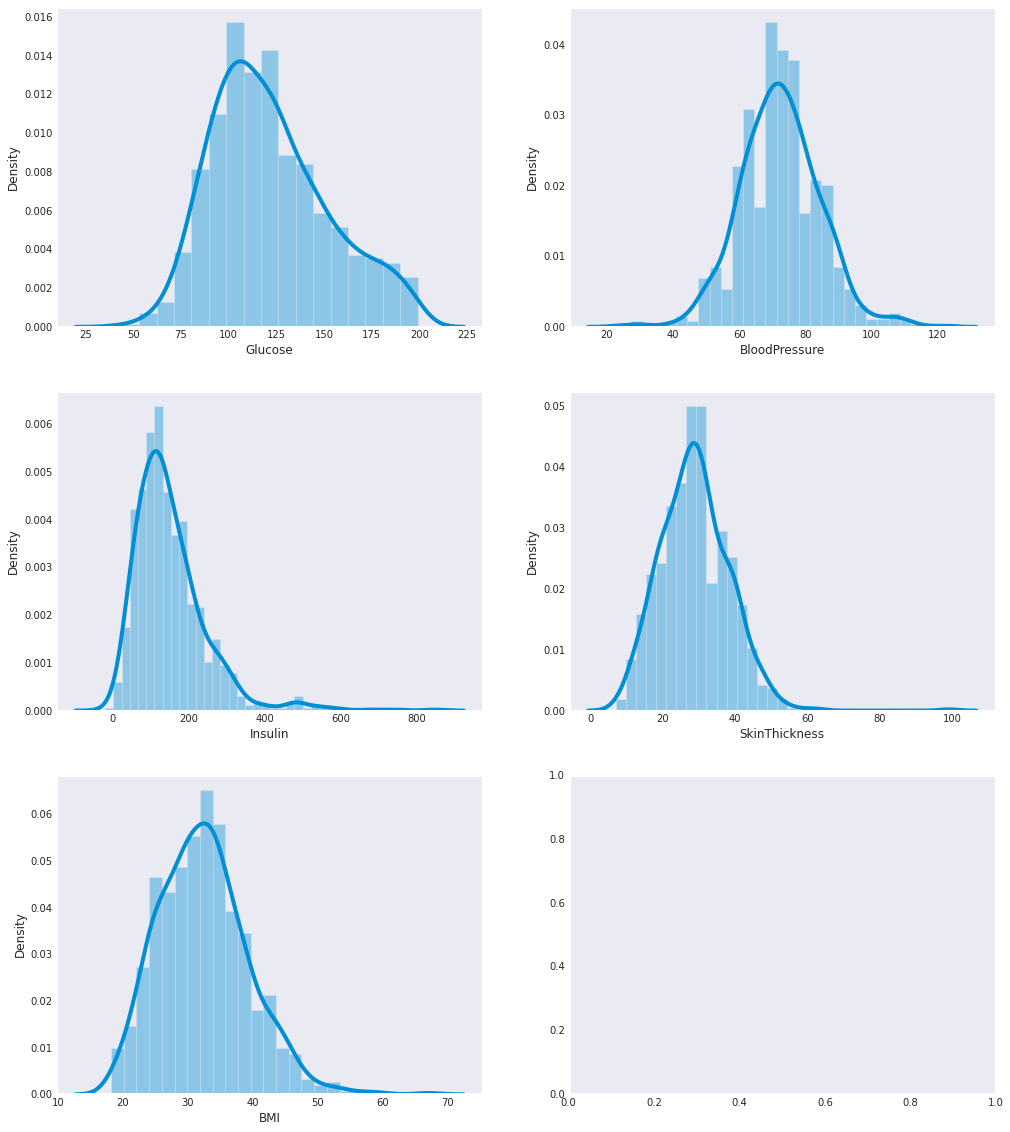

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
sns.distplot(df_eda.Glucose, ax=ax[0][0])
sns.distplot(df_eda.BloodPressure, ax=ax[0][1])
sns.distplot(df_eda.Insulin, ax=ax[1][0])
sns.distplot(df_eda.SkinThickness, ax=ax[1][1])
sns.distplot(df_eda.BMI, ax=ax[2][0])

In [12]:
# New DataFrame for Tableau
df_tb = df_eda.copy()
df_tb = df_tb.reset_index().rename({'index': 'Serial Number'}, axis = 1)
df_tb.to_csv('Tableau_Data_Diabetes.csv', index = False)

## Create a count (frequency) plot describing the data types and the count of variables.

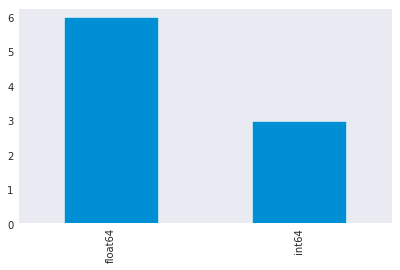

In [13]:
df.dtypes.value_counts().plot(kind='bar')

## Data Exploration:
1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

## Checking balance of the data by plotting the count of outcomes by their value

[Text(0.5, 1.0, 'Data Balance Check')]

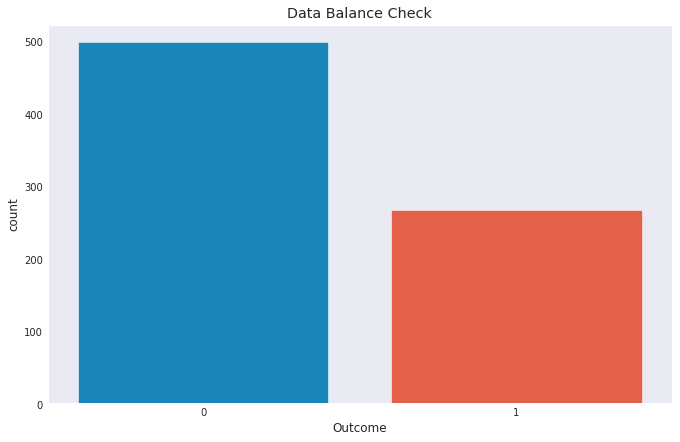

In [14]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'Outcome').set(title="Data Balance Check")

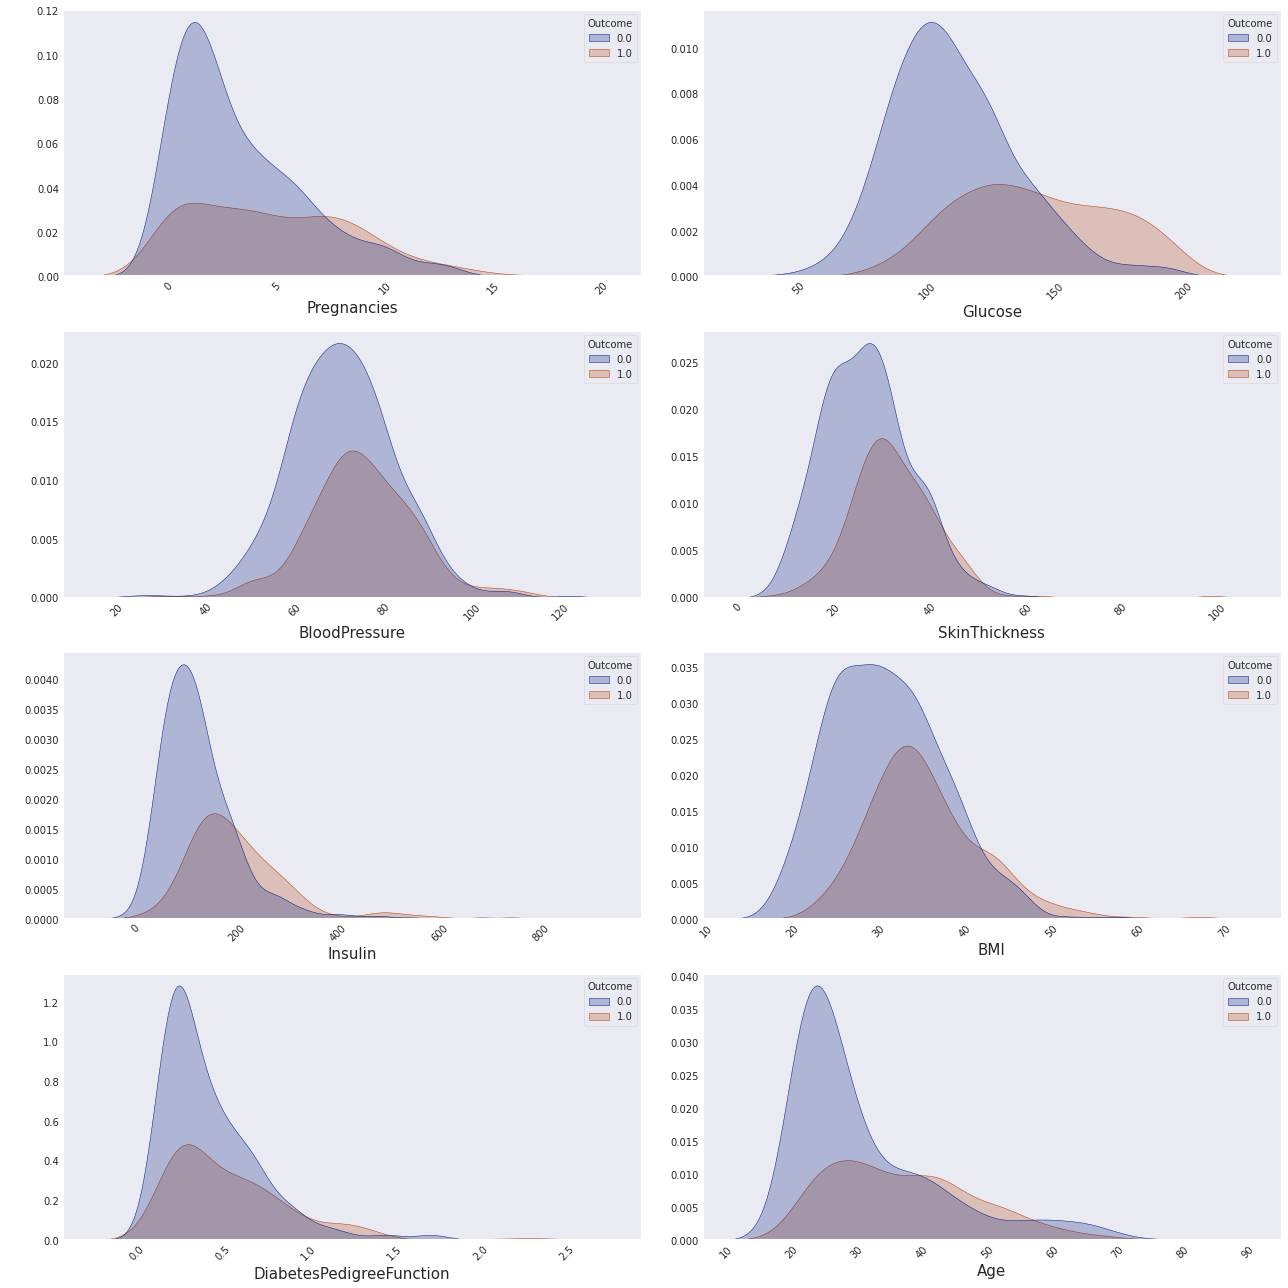

In [15]:
plt.figure(figsize = (18,18))
for i in enumerate(df_eda.drop(['Outcome'], axis = 1).columns):
  plt.subplot(4,2,i[0]+1)
  sns.kdeplot(data = df_eda, x = i[1], hue = 'Outcome', fill = 'dark', palette = 'dark' )
  plt.xlabel(i[1],fontsize = 15)
  plt.ylabel(" ")
  plt.xticks(rotation = 45)  
  plt.tight_layout()

## Scatter charts between the pair of variables to understand the relationships.

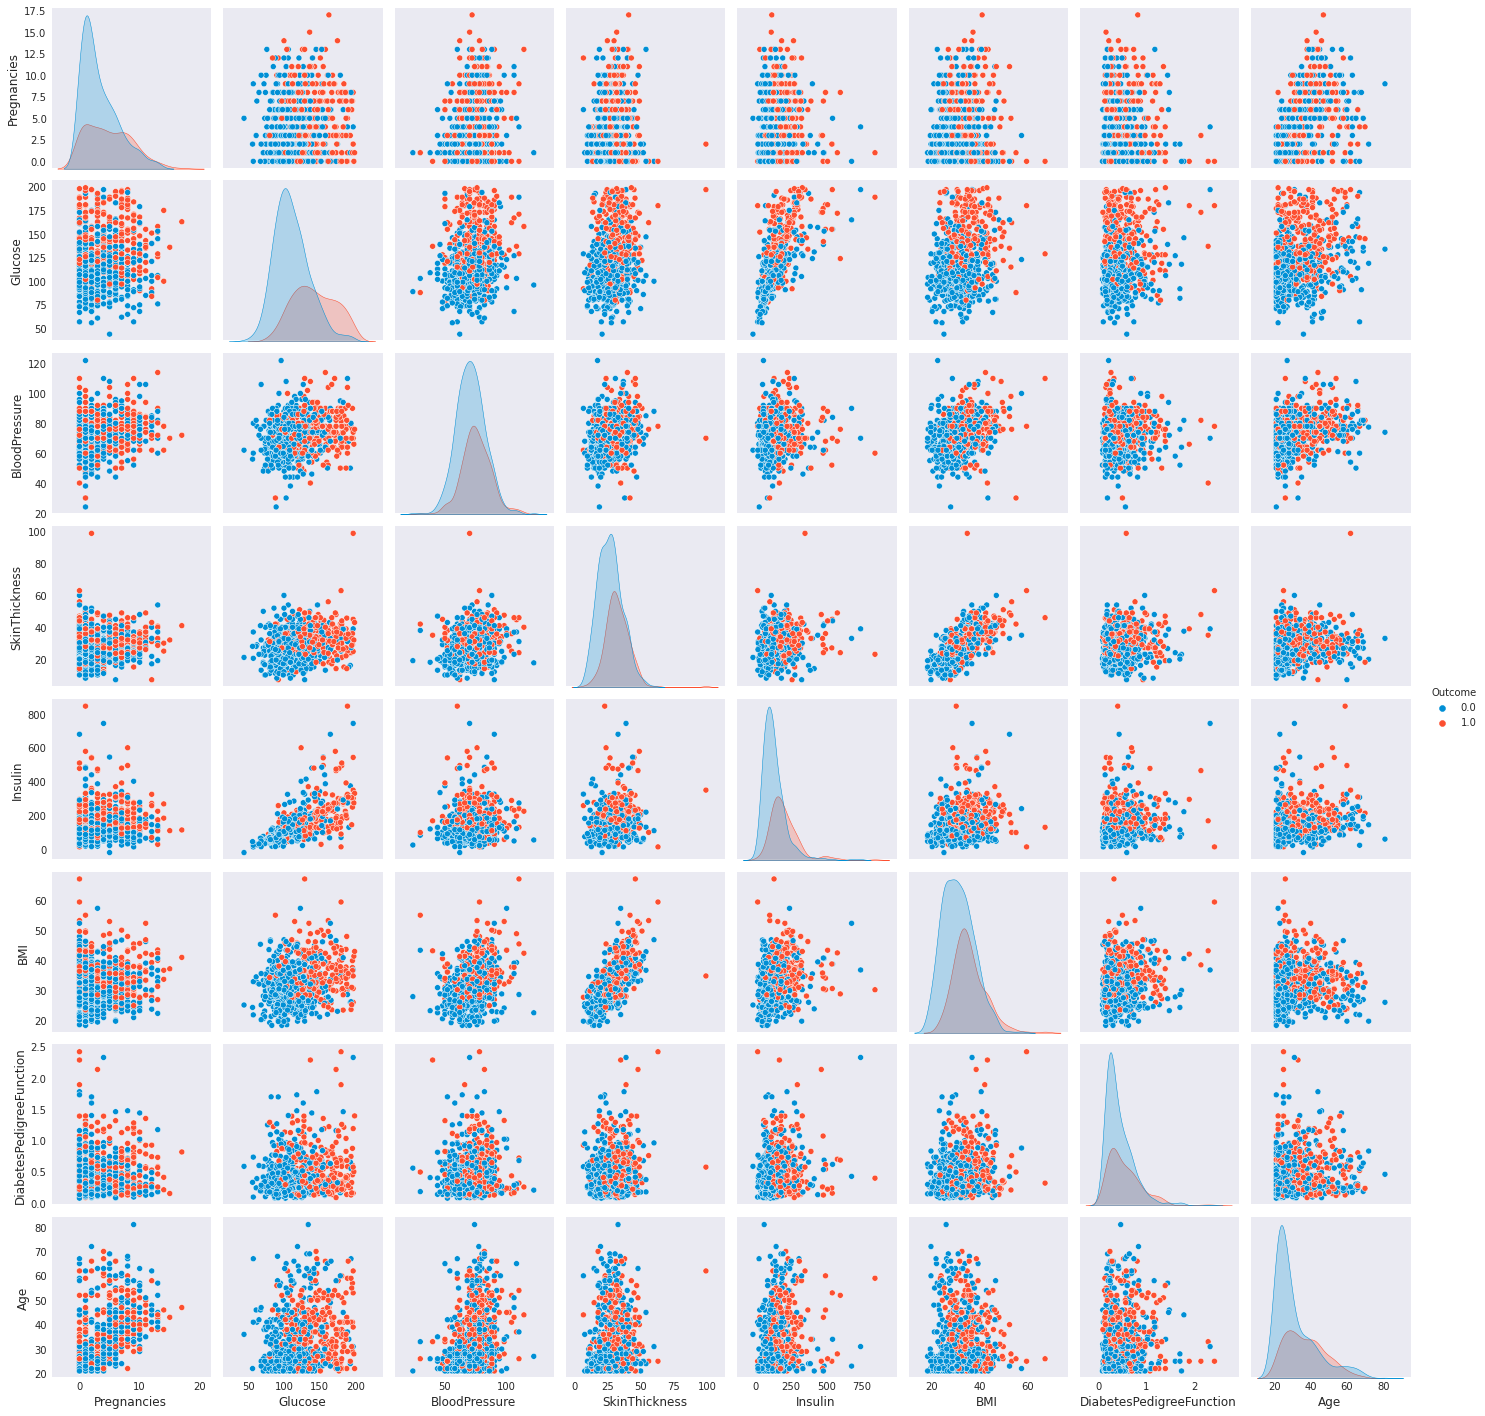

In [16]:
sns.pairplot(df_eda, hue='Outcome')

## Perform correlation analysis. 

In [17]:
cor = df_eda.corr()
matrix = np.triu(cor)

## Visually exploring it using a heat map.

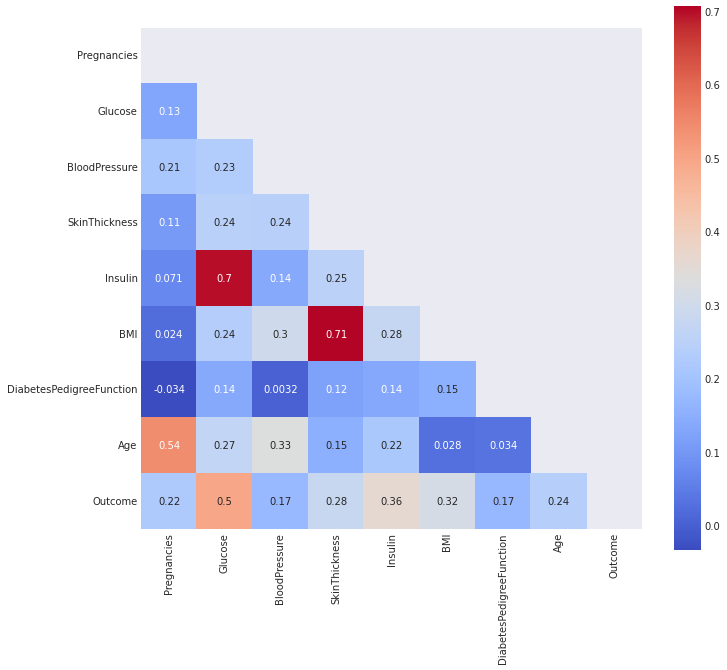

In [18]:
#Plot the Heat map
plt.figure(figsize = (10,10))
sns.heatmap(cor, mask=matrix, square=True, annot = True, cmap='coolwarm')

## Observations
* Data is not balanced.
* Approach we will use:
 1.
 2. Use Accuracy to to check a generalized model
 3. Use Precision-Recall Pair to check the quality of the model.

## Scatter Chart analysis

* BMI and Skinthickness have a positive correlation
* Insulin and Glucose have a positive correlation.
* Rest other fields are uncorrelated or very weakly correlated.

## Correlation Analysis

* Outcome doesn't have high correlation with other variables. It is moderately correlated with Glucose.
* BMI-Skinthickness and Insulin-Glucose are the highest correlated.
* Pregnancies and Age are moderately correlated.

In [19]:
#Using Label Encoding for Pregnancies Variable
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(list(df_eda['Pregnancies'].astype('str').values))
df_eda['Pregnancies'] = label_encoder.transform(df_eda['Pregnancies'].astype('str'))

In [20]:
# Implementing Oversampling for Handling Imbalanced Data
X = df_eda.drop(['Outcome'], axis =1)
Y = df_eda[['Outcome']]
smk = SMOTETomek(random_state=42)
col_X = list(X.columns)
col_y = list(Y.columns)
X_res,y_res=smk.fit_resample(X,Y)
print(X_res.shape,y_res.shape)
X = pd.DataFrame(X_res, columns = col_X)
Y = pd.DataFrame(y_res, columns = col_y)
df = X
df['Outcome'] = y_res
print(f"Size of dataset after resampling: {df_eda.shape}")
from collections import Counter
print(f'Original dataset variable : {Counter(df_eda["Outcome"])}')
print(f'Resampled dataset variable : {Counter(df["Outcome"])}')

(956, 8) (956, 1)
Size of dataset after resampling: (768, 9)
Original dataset variable : Counter({0.0: 500, 1.0: 268})
Resampled dataset variable : Counter({1.0: 478, 0.0: 478})


In [21]:
#Dataframe for model building
df['Outcome'] = df['Outcome'].astype(int)
data_proc = df.copy()

## Data Modeling:
1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
3. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

##### Rules for Classification Use Case if we are using SKLEARN for modeling
* Data must be complete
* Features must be strictly numeric. Labels can be categorical or discreate
* Data must be represented in form of numpy array
* Features must be a 2d array
* Labels must be a 1d array

##### Check the quality of the model
1. Ensure your model is generalized model
2. If the dataset is balanced, check the accuracy score and compare the same with the CL Value
3. If dataset is unbalanced, check the non-tolerable scenario and get the area of focus.
4. Based on aread of focus, get relevant Precision and Recall Scores.
5. Take Average and compare it with CL

## Importing Libraries for Modeling

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import (classification_report, f1_score, 
                             accuracy_score, mean_squared_error, 
                             roc_auc_score, confusion_matrix, roc_curve, 
                             recall_score, precision_score, precision_recall_curve, auc)
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier)
from xgboost import XGBRFClassifier

## Creating Features & Labels then splitting the data

In [23]:
#Create Features by using StandardScaler to standardize the data
features = StandardScaler().fit_transform(data_proc.drop(['Outcome'], axis='columns'))
#Create Label
label = data_proc.Outcome.values

## Comparing the models all together to get the Accuracy, AUC

In [24]:
svc = SVC( kernel="linear", class_weight='balanced', probability=True )
knc = KNeighborsClassifier(n_neighbors=7, weights='distance')
lrc = LogisticRegression(class_weight='balanced', max_iter=500)
rfc = RandomForestClassifier( random_state=7)
bc = BaggingClassifier(random_state=7)
xgbrf = XGBRFClassifier(random_state=7,eval_metric='mlogloss')
abc = AdaBoostClassifier( random_state=7)


clfs = {'SVC':svc,
    'KN' : knc, 
    'LR': lrc, 
    'RF': rfc,  
    'BgC': bc, 
    'XGBRF':xgbrf,
    'AdaBoost': abc,
}

def train_clf(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    train_pred = clf.predict_proba(X_train)[:, 1]
    test_pred = clf.predict_proba(X_test)[:, 1]
    accuracy_train = clf.score(X_train,y_train )
    accuracy_test = clf.score(X_test,y_test)
    auc_train = metrics.roc_auc_score(y_train, train_pred)
    auc_test = metrics.roc_auc_score(y_test, test_pred)
    
    return accuracy_train,accuracy_test, auc_train, auc_test


accuracy_scores_tr = []
accuracy_scores_ts = []
auc_train_scores = []
auc_test_scores = []


X_train, X_test, y_train, y_test = train_test_split(data_proc.drop('Outcome', axis =1), data_proc['Outcome'], test_size= 0.2, 
                                                    random_state = 42)

for algorithm,clf in clfs.items():   
    current_accuracy_tr,current_accuracy_ts,auc_tr, auc_ts = train_clf(clf, X_train,y_train,X_test,y_test)
    accuracy_scores_tr.append(current_accuracy_tr)
    accuracy_scores_ts.append(current_accuracy_ts)
    auc_train_scores.append(auc_tr)
    auc_test_scores.append(auc_ts)

In [25]:
#Plotting the Table
perf_table = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy Train':accuracy_scores_tr,'Accuracy Test':accuracy_scores_ts,
                               'AUC Test':auc_test_scores,}).sort_values(by = 'AUC Test', ascending= False).style.background_gradient(cmap = 'BuPu', subset = [ 'AUC Test', 'Accuracy Test','Accuracy Train'])
perf_table

,Algorithm,Accuracy Train,Accuracy Test,AUC Test
3,RF,1.000000,0.812500,0.902442
6,AdaBoost,0.857330,0.781250,0.869343
4,BgC,0.990838,0.791667,0.863646
1,KN,1.000000,0.760417,0.854639
5,XGBRF,0.827225,0.776042,0.848996
0,SVC,0.746073,0.750000,0.834292
2,LR,0.746073,0.744792,0.830819


## Observations
* Above models RF, XGBRF, AdaBoost, Bgc, KN are not generalized.

We will follow below steps until we get Generalized model.
* First Step : Tune the HyperParameters using GridSearch.
* Second Step : Tune using KFold technique to get generalized model.
* Thirsd Step : Using Boosting or Bagging to finally generalized model.

## Hyperparameters Tunning for KNN

In [26]:
#Initiate the algo
algo_knn_clf= KNeighborsClassifier()

In [27]:
# Technique to perform Hyperparameter tuning using GridSearch CV

# Design your parameter grid. In Python Parameter grid must be represented in the form of dictonary.

knn_paramGrid = dict(n_neighbors = np.arange(2,32),
                     weights = ['distance', 'uniform'],
                     algorithm = ['ball_tree', 'kd_tree', 'brute'])

knn_grid = GridSearchCV(algo_knn_clf,
                        param_grid = knn_paramGrid,
                        cv=10)

In [28]:
#Execute Grid Search
knn_grid.fit(features,label)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
                         'weights': ['distance', 'uniform']})

In [29]:
#Finding the best Estimator
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4, weights='distance')

## K-Fold for KNN

In [30]:
#Initiate the algo using best parameters
kfold_knn_clf= KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4, weights='distance')

#Specify K-Fold
kfold_knn= KFold(n_splits=10,
               shuffle=True,
               random_state=1) # Goal of RS is to persist my KFold so that we can extract the sample

# Initialize for loop to identify which sample split gives the best score

counter = 0
for train,test in kfold_knn.split(features):
    # Counter will help track the sample
    counter = counter + 1
    
    #Extract train and test set
    X_train,X_test = features[train],features[test]
    y_train,y_test = label[train],label[test]
    
    #Fit the data with model algo
    kfold_knn_clf.fit(X_train,y_train)
    if (kfold_knn_clf.score(X_test,y_test) >= 0.85):
        print("Test Score: {}, Train Score: {}, for Sample Split {}".format(kfold_knn_clf.score(X_test,y_test),kfold_knn_clf.score(X_train,y_train),counter))

Test Score: 0.8541666666666666, Train Score: 1.0, for Sample Split 2
Test Score: 0.875, Train Score: 1.0, for Sample Split 5
Test Score: 0.8526315789473684, Train Score: 1.0, for Sample Split 9


In [31]:
#Extract the final Test, Train Split -- Best Sample which is Split 9

kfold_knn= KFold(n_splits=10,
               shuffle=True,
               random_state=1)

counter = 0

for train,test in kfold_knn.split(features):
    # Counter will help track the sample
    counter = counter + 1
    
    if counter == 5:
        X_train,X_test,y_train,y_test = features[train],features[test],label[train],label[test]

## Observation - KNN
* We cannot deploy this Model as it is not yet Generalized.

## Bagging Classifier using Sampling with Replacement Technique on KNN
* We will make use of Bagging Classifier to generalized the model as Train Score is coming more than Test Score.

In [32]:
# Define Algo for KNN for Bagging
algorithmknn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6, weights='distance')

In [33]:
#Finding the best random_state value to create Generalized model
samplesize = int(round(np.sqrt(len(X_train))))
for i in range(1,101):
    model_knn = BaggingClassifier(n_estimators=11,                        #Number of Learners
                              base_estimator=algorithmknn,              #Algorithm
                              max_samples=samplesize,                   #Number of data points per model
                              bootstrap=True,                           #Sample with replacement
                              random_state=i)
    model_knn.fit(X_train,y_train)
    train_score=model_knn.score(X_train,y_train)
    test_score=model_knn.score(X_test,y_test)
    #print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))
    if (test_score > train_score) and (test_score > 0.79):
        print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))

Test: 0.7916666666666666, Train: 0.7883720930232558, RS: 32
Test: 0.7916666666666666, Train: 0.7744186046511627, RS: 41
Test: 0.7916666666666666, Train: 0.7906976744186046, RS: 61
Test: 0.7916666666666666, Train: 0.7848837209302325, RS: 62
Test: 0.7916666666666666, Train: 0.7779069767441861, RS: 65
Test: 0.7916666666666666, Train: 0.786046511627907, RS: 87


In [34]:
# Deploy Model
model_knn = BaggingClassifier(n_estimators=11,                        #Number of Learners
                              base_estimator=algorithmknn,              #Algorithm
                              max_samples=samplesize,                   #Number of data points per model
                              bootstrap=True,                           #Sample with replacement
                              random_state=61)
model_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                      n_neighbors=6,
                                                      weights='distance'),
                  max_samples=29, n_estimators=11, random_state=61)

In [35]:
print("Test Score",model_knn.score(X_test,y_test))
print("Train Score",model_knn.score(X_train,y_train))

Test Score 0.7916666666666666
Train Score 0.7906976744186046


* KNN Model has now become Generalized where Test Score > Train Score

Now we can go ahead perform below steps:
* Prediction
* Plot Confusion Matrix
* Plot ROC AUC Curve

In [36]:
# Prediction
knn_pred = model_knn.predict(X_test)

In [37]:
#Model Values
knn_model_vals = dict(accuracy=accuracy_score(y_test, knn_pred),
                    auc=roc_auc_score(y_test, knn_pred),
                    recall=recall_score(y_test, knn_pred),
                    precision=precision_score(y_test, knn_pred),
                    f1_score = f1_score(y_test, knn_pred),
                    )
print(classification_report(label, model_knn.predict(features)))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       478
           1       0.75      0.88      0.81       478

    accuracy                           0.79       956
   macro avg       0.80      0.79      0.79       956
weighted avg       0.80      0.79      0.79       956



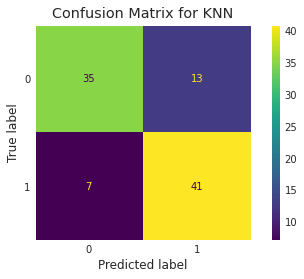

In [38]:
#Plot Confusion Matrix
plot_confusion_matrix(model_knn, X_test, y_test)  
plt.title("Confusion Matrix for KNN")
plt.show()

AUC for KNN: 0.8363715277777777


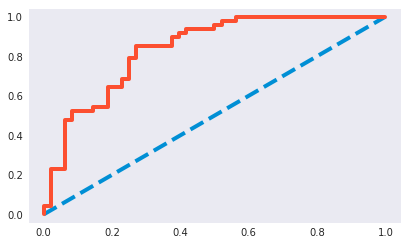

In [39]:
#Plotting the ROC curve for test model
#1. Extract Probability values for 1
probability_values_roc_knn = model_knn.predict_proba(X_test)[:,1]
#2. Calculate AUC
auc_roc_knn = roc_auc_score(y_test,probability_values_roc_knn)
print("AUC for KNN:",auc_roc_knn)
#3. Plot the Skill Line
plt.plot([0,1],[0,1], linestyle='--')
#4. Plot ROC Curve
fpr_knn,tpr_knn,thres_knn= roc_curve(y_test,probability_values_roc_knn)
gmean_knn = np.sqrt(tpr_knn * (1-fpr_knn))
ix_knn = np.argmax(gmean_knn)
plt.plot(fpr_knn,tpr_knn)

## Performance
* KNN False Positive = 7
* KNN AUC = 0.83

## Hyperparameters Tunning for LR

In [40]:
#Initiate
algo_lr_clf= LogisticRegression()

In [41]:
# Technique to perform Hyperparameter tuning using GridSearch CV

# Design your parameter grid. In Python Parameter grid must be represented in the form of dictonary.

lr_paramGrid = dict(C = np.arange(0.0001, 5.0),
                    max_iter = np.arange(50, 1000),
                    penalty = ['l1', 'l2'],
                    solver = ['liblinear'])

lr_grid = GridSearchCV(algo_lr_clf,
                        param_grid = lr_paramGrid,
                        cv=10)

In [42]:
#Execute Grid Search
lr_grid.fit(features,label)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00]),
                         'max_iter': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,...
       921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933,
       934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946,
       947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959,
       960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972,
       973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985,
       986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998,
       999]),
             

In [43]:
#Finding the best Estimator
lr_grid.best_estimator_

LogisticRegression(C=1.0001, max_iter=50, solver='liblinear')

## Logistic Regression using K-Fold Cross Validation Technique

In [44]:
#Initiate the algo
kfold_lr_clf= LogisticRegression(C=1.0001, max_iter=50, solver='liblinear')

#Specify K-Fold
kfold_lr= KFold(n_splits=10,
               shuffle=True,
               random_state=1) # Goal of RS is to persist my KFold so that we can extract the sample

# Initialize for loop to identify which sample split gives the best score

counter = 0
for train,test in kfold_lr.split(features):
    # Counter will help track the sample
    counter = counter + 1
    
    #Extract train and test set
    X_train,X_test = features[train],features[test]
    y_train,y_test = label[train],label[test]
    
    #Fit the data with model algo
    kfold_lr_clf.fit(X_train,y_train)
    if (kfold_lr_clf.score(X_test,y_test) >= 0.8)and ((kfold_lr_clf.score(X_test,y_test)) > (kfold_lr_clf.score(X_train,y_train))):
        print("Test Score: {}, Train Score: {}, for Sample Split {}".format(kfold_lr_clf.score(X_test,y_test),kfold_lr_clf.score(X_train,y_train),counter))

Test Score: 0.8125, Train Score: 0.7383720930232558, for Sample Split 6
Test Score: 0.8105263157894737, Train Score: 0.7456445993031359, for Sample Split 9


In [45]:
#Extract the final Test, Train Split -- Best Sample which is Split 9
#We are getting Generalized Value as Test Score(0.81) > Train Score (0.74)

kfold_lr= KFold(n_splits=10,
               shuffle=True,
               random_state=1)

counter = 0

for train,test in kfold_lr.split(features):
    # Counter will help track the sample
    counter = counter + 1
    
    if counter == 9:
        X_train,X_test,y_train,y_test = features[train],features[test],label[train],label[test]

In [46]:
#Deploy the Model
lr_clf = LogisticRegression(C=1.0001, max_iter=50, solver='liblinear')
lr_clf.fit(X_train,y_train)

LogisticRegression(C=1.0001, max_iter=50, solver='liblinear')

In [47]:
# Prediction
lr_pred = lr_clf.predict(X_test)

In [48]:
#Model Values
lr_model_vals = dict(accuracy=accuracy_score(y_test, lr_pred),
                    auc=roc_auc_score(y_test, lr_pred),
                    recall=recall_score(y_test, lr_pred),
                    precision=precision_score(y_test, lr_pred),
                    f1_score = f1_score(y_test, lr_pred),
                    )
print(classification_report(label, lr_clf.predict(features)))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       478
           1       0.78      0.71      0.74       478

    accuracy                           0.75       956
   macro avg       0.75      0.75      0.75       956
weighted avg       0.75      0.75      0.75       956



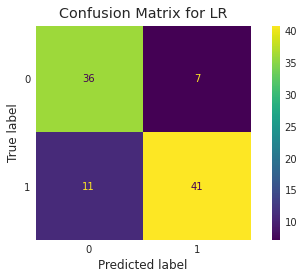

In [49]:
#Plot Confusion Matrix
plot_confusion_matrix(lr_clf, X_test, y_test)  
plt.title("Confusion Matrix for LR")
plt.show()

## ROC AUC Curve Implementation Logistic Regression

AUC for LR: 0.9136851520572451


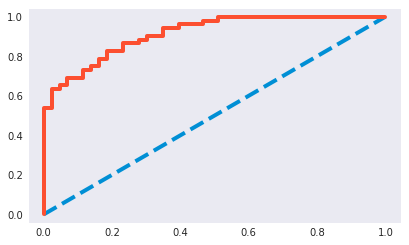

In [50]:
#Plotting the ROC curve for test model
#1. Extract Probability values for 1
probability_values_roc_lr = lr_clf.predict_proba(X_test)[:,1]
#2. Calculate AUC
auc_roc_lr = roc_auc_score(y_test,probability_values_roc_lr)
print("AUC for LR:",auc_roc_lr)
#3. Plot the Skill Line
plt.plot([0,1],[0,1], linestyle='--')
#4. Plot ROC Curve
fpr_lr,tpr_lr,thres_lr= roc_curve(y_test,probability_values_roc_lr)
gmean_lr = np.sqrt(tpr_lr * (1-fpr_lr))
ix_lr = np.argmax(gmean_lr)
plt.plot(fpr_lr,tpr_lr)

## Performance
* LR False Positive = 11
* LR AUC = 0.91

## PR AUC Curve Implementation Logistic Regression

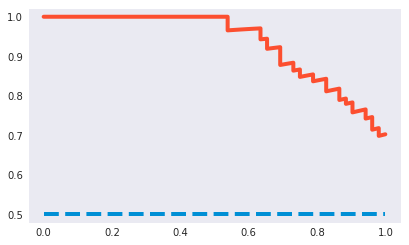

In [51]:
#Plotting the PR curve for test model
#1. Extract Probability values for 1
probability_values_pr_lr = lr_clf.predict_proba(X_test)[:,1]
#2. Calculate AUC
pr_lr,re_lr,th_lr = precision_recall_curve(y_test,probability_values_pr_lr)
auc_pr_lr = auc(re_lr,pr_lr)
#3. Plot the Skill Line
plt.plot([0,1],[0.5,0.5], linestyle='--')
#4. Plot ROC Curve
plt.plot(re_lr,pr_lr)

## Observations:
* LR has more AUC than KNN. 
* KNN has more Accuracy than LR.
* KNN had lesser False Positives than LR.
* Our target are Precision of 0 and Recall of 1. As we do not want to miss any diabetic patient. So lesser the False Positive better the Algorithim or Model
* As our data is imbalanced we are checking PR AUC curve also and we found out that the line is not touching the skill line. Hence both LR and KNN Model are accepted for final voting.

## Hyperparameters Tunning for RF

In [52]:
#Initiate the algo
algo_rf_clf= RandomForestClassifier()

In [53]:
# Technique to perform Hyperparameter tuning using GridSearch CV

# Design your parameter grid. In Python Parameter grid must be represented in the form of dictonary.

rf_paramGrid = dict(n_estimators = [235],
                   max_depth = np.arange(135,140),
                   criterion = ['entropy'],
                   max_features = ['log2'],
                   oob_score = [True])

rf_grid = GridSearchCV(algo_rf_clf,
                        param_grid = rf_paramGrid,
                        cv=10)

In [54]:
#Execute Grid Search
rf_grid.fit(features,label)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': array([135, 136, 137, 138, 139]),
                         'max_features': ['log2'], 'n_estimators': [235],
                         'oob_score': [True]})

In [55]:
#Finding the best Estimator
rf_grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=136, max_features='log2',
                       n_estimators=235, oob_score=True)

In [56]:
#Initiate the algo using best parameters
kfold_rf_clf= RandomForestClassifier(criterion='entropy', max_depth=138, max_features='log2',
                       n_estimators=235, oob_score=True)

#Specify K-Fold
kfold_rf= KFold(n_splits=10,
               shuffle=True,
               random_state=1) # Goal of RS is to persist my KFold so that we can extract the sample

# Initialize for loop to identify which sample split gives the best score

counter = 0
for train,test in kfold_rf.split(features):
    # Counter will help track the sample
    counter = counter + 1
    
    #Extract train and test set
    X_train,X_test = features[train],features[test]
    y_train,y_test = label[train],label[test]
    
    #Fit the data with model algo
    kfold_rf_clf.fit(X_train,y_train)
    if (kfold_rf_clf.score(X_test,y_test) >= 0.85):
        print("Test Score: {}, Train Score: {}, for Sample Split {}".format(kfold_rf_clf.score(X_test,y_test),kfold_rf_clf.score(X_train,y_train),counter))

Test Score: 0.8645833333333334, Train Score: 1.0, for Sample Split 3
Test Score: 0.875, Train Score: 1.0, for Sample Split 5
Test Score: 0.90625, Train Score: 1.0, for Sample Split 6
Test Score: 0.8736842105263158, Train Score: 1.0, for Sample Split 7
Test Score: 0.8947368421052632, Train Score: 1.0, for Sample Split 9


In [57]:
#Extract the final Test, Train Split -- Best Sample which is Split 9

kfold_rf= KFold(n_splits=10,
               shuffle=True,
               random_state=1)

counter = 0

for train,test in kfold_rf.split(features):
    # Counter will help track the sample
    counter = counter + 1
    
    if counter == 5:
        X_train,X_test,y_train,y_test = features[train],features[test],label[train],label[test]

## Observation - RF
* We cannot deploy this Model as it is not yet Generalized.

## Bagging Classifier using Sampling with Replacement Technique on RF
* We will make use of Bagging Classifier to generalized the model as Train Score is coming more than Test Score.

In [58]:
# Define Algo for KNN for Bagging
algorithmrf = RandomForestClassifier(criterion='entropy', max_depth=138, max_features='log2',
                       n_estimators=235, oob_score=True)

In [59]:
#Finding the best random_state value to create Generalized model
samplesize = int(round(np.sqrt(len(X_train))))
for i in range(1,101):
    model_rf = BaggingClassifier(n_estimators=11,                       #Number of Learners
                              base_estimator=algorithmrf,               #Algorithm
                              max_samples=samplesize,                   #Number of data points per model
                              bootstrap=True,                           #Sample with replacement
                              random_state=i)
    model_rf.fit(X_train,y_train)
    train_score=model_rf.score(X_train,y_train)
    test_score=model_rf.score(X_test,y_test)
    #print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))
    if (test_score > train_score) and (test_score > 0.79):
        print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))

Test: 0.8020833333333334, Train: 0.7895348837209303, RS: 65
Test: 0.8020833333333334, Train: 0.791860465116279, RS: 97


In [60]:
# Using the Random State from above 2 with the highest Test and Train Score we will deploy the model
model_rf = BaggingClassifier(n_estimators=11,                           #Number of Learners
                              base_estimator=algorithmrf,               #Algorithm
                              max_samples=samplesize,                   #Number of data points per model
                              bootstrap=True,                           #Sample with replacement
                              random_state=97)
model_rf.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        max_depth=138,
                                                        max_features='log2',
                                                        n_estimators=235,
                                                        oob_score=True),
                  max_samples=29, n_estimators=11, random_state=97)

In [61]:
print("Test Score",model_rf.score(X_test,y_test))
print("Train Score",model_rf.score(X_train,y_train))

Test Score 0.8020833333333334
Train Score 0.791860465116279


* RF Model has now become Generalized where Test Score > Train Score

Now we can go ahead perform below steps:
* Prediction
* Plot Confusion Matrix
* Plot ROC AUC Curve

In [62]:
# Prediction
rf_pred = model_rf.predict(X_test)

In [63]:
#Model Values RF
rf_model_vals = dict(accuracy=accuracy_score(y_test, rf_pred),
                    auc=roc_auc_score(y_test, rf_pred),
                    recall=recall_score(y_test, rf_pred),
                    precision=precision_score(y_test, rf_pred),
                    f1_score = f1_score(y_test, rf_pred),
                    )
print(classification_report(label, model_rf.predict(features)))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       478
           1       0.78      0.81      0.80       478

    accuracy                           0.79       956
   macro avg       0.79      0.79      0.79       956
weighted avg       0.79      0.79      0.79       956



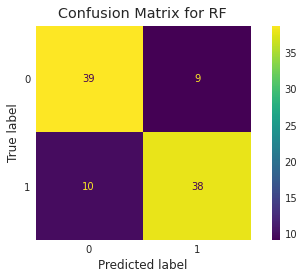

In [64]:
#Plot Confusion Matrix
plot_confusion_matrix(model_rf, X_test, y_test)  
plt.title("Confusion Matrix for RF")
plt.show()

AUC for rf: 0.8483072916666667


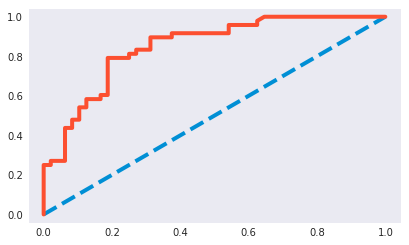

In [65]:
#Plotting the ROC curve for test model
#1. Extract Probability values for 1
probability_values_roc_rf = model_rf.predict_proba(X_test)[:,1]
#2. Calculate AUC
auc_roc_rf = roc_auc_score(y_test,probability_values_roc_rf)
print("AUC for rf:",auc_roc_rf)
#3. Plot the Skill Line
plt.plot([0,1],[0,1], linestyle='--')
#4. Plot ROC Curve
fpr_rf,tpr_rf,thres_rf= roc_curve(y_test,probability_values_roc_rf)
gmean_rf = np.sqrt(tpr_rf * (1-fpr_rf))
ix_rf = np.argmax(gmean_rf)
plt.plot(fpr_rf,tpr_rf)

## Performance
* RF False Positive = 10
* RF AUC = 0.84

## Observations:
* RF has more AUC than KNN.
* KNN and RF has same accuracy after the model is Generalized.
* KNN had lesser False Positives than RF.
* Our target are Precision of 0 and Recall of 1. As we do not want to miss any diabetic patient. So lesser the False Positive better the Algorithim or Model
* Here both RF and KNN Model are accepted for final voting.

## XGRFBoost Classifier

In [66]:
#Finding the Train and Test Data which will create Generalized model
for i in range(1,101):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=i)
    model = XGBRFClassifier(learning_rate=0.001,eval_metric='mlogloss')
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    #print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))
    if (test_score > train_score) and (test_score > 0.84):
        print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))

Test: 0.84375, Train: 0.8023560209424084, RS: 72
Test: 0.84375, Train: 0.81282722513089, RS: 81


In [67]:
#Creating XGRFBoost Classifier Generalized model using the Train and Test Data for Random State 81.
X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=81)
model_xgbrf = XGBRFClassifier(learning_rate=0.001,eval_metric='mlogloss')
model_xgbrf.fit(X_train,y_train)

XGBRFClassifier(eval_metric='mlogloss', learning_rate=0.001)

In [68]:
# Prediction
xgbrf_pred = model_xgbrf.predict(X_test)

In [69]:
#Model Values
xgbrf_model_vals = dict(accuracy=accuracy_score(y_test, xgbrf_pred),
                    auc=roc_auc_score(y_test, xgbrf_pred),
                    recall=recall_score(y_test, xgbrf_pred),
                    precision=precision_score(y_test, xgbrf_pred),
                    f1_score = f1_score(y_test, xgbrf_pred),
                    )
print(classification_report(label, model_xgbrf.predict(features)))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       478
           1       0.79      0.87      0.83       478

    accuracy                           0.82       956
   macro avg       0.82      0.82      0.82       956
weighted avg       0.82      0.82      0.82       956



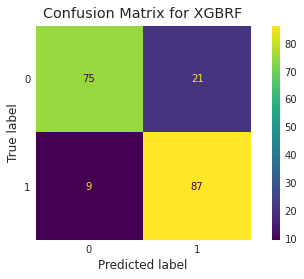

In [70]:
#Plot Confusion Matrix
plot_confusion_matrix(model_xgbrf, X_test, y_test)  
plt.title("Confusion Matrix for XGBRF")
plt.show()

AUC for xgbrf: 0.9044596354166669


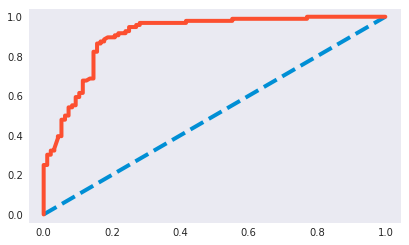

In [71]:
#Plotting the ROC curve for test model
#1. Extract Probability values for 1
probability_values_roc_xgbrf = model_xgbrf.predict_proba(X_test)[:,1]
#2. Calculate AUC
auc_roc_xgbrf = roc_auc_score(y_test,probability_values_roc_xgbrf)
print("AUC for xgbrf:",auc_roc_xgbrf)
#3. Plot the Skill Line
plt.plot([0,1],[0,1], linestyle='--')
#4. Plot ROC Curve
fpr_xgbrf,tpr_xgbrf,thres_xgbrf= roc_curve(y_test,probability_values_roc_xgbrf)
gmean_xgbrf = np.sqrt(tpr_xgbrf * (1-fpr_xgbrf))
ix_xgbrf = np.argmax(gmean_xgbrf)
plt.plot(fpr_xgbrf,tpr_xgbrf)

## Observations:
* XGBRF has more AUC than KNN.
* XGBRF has more Accuracy than KNN.
* KNN had lesser False Positives than RF.
* Our target are Precision of 0 and Recall of 1. As we do not want to miss any diabetic patient. So lesser the False Positive better the Algorithim or Model
* Here both XGBRF and KNN Model are accepted for final voting.

## Adaptive Boosting on LR

In [72]:
#Finding the Train and Test Data which will create Generalized model
algorithmLR = LogisticRegression(C=1.0001, max_iter=50, solver='liblinear')

for i in range(1,101):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.15,
                                                    random_state=i)
    model_ad_lr = AdaBoostClassifier(base_estimator=algorithmLR,n_estimators=101)
    model_ad_lr.fit(X_train,y_train)
    
    train_score=model_ad_lr.score(X_train,y_train)
    test_score=model_ad_lr.score(X_test,y_test)
    #print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))
    if (test_score > train_score) and (test_score > 0.8):
        print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))

Test: 0.8402777777777778, Train: 0.7229064039408867, RS: 72


In [73]:
#Creating Adaboosting LR Generalized model using the Train and Test Data for Random State 72.
X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.15,
                                                    random_state=72)
algorithmLR = LogisticRegression(class_weight='balanced', max_iter=500)
model_ad_lr = AdaBoostClassifier(base_estimator=algorithmLR)
model_ad_lr.fit(X_train,y_train)
    
train_score=model_ad_lr.score(X_train,y_train)
test_score=model_ad_lr.score(X_test,y_test)
print("Test: {}, Train: {}".format(test_score,train_score))

Test: 0.8402777777777778, Train: 0.7241379310344828


## Observations
* Benifit of using Adaptive Boosting is it is giving Generalized model and the test accurasy score has increased too for LR

In [74]:
# Prediction
ad_lr_pred = model_ad_lr.predict(X_test)

In [75]:
#Model Values
ad_lr_model_vals = dict(accuracy=accuracy_score(y_test, ad_lr_pred),
                    auc=roc_auc_score(y_test, ad_lr_pred),
                    recall=recall_score(y_test, ad_lr_pred),
                    precision=precision_score(y_test, ad_lr_pred),
                    f1_score = f1_score(y_test, ad_lr_pred),
                    )
print(classification_report(label, model_ad_lr.predict(features)))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       478
           1       0.76      0.70      0.73       478

    accuracy                           0.74       956
   macro avg       0.74      0.74      0.74       956
weighted avg       0.74      0.74      0.74       956



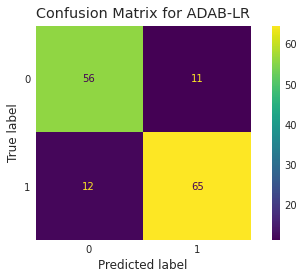

In [76]:
#Plot Confusion Matrix
plot_confusion_matrix(model_ad_lr, X_test, y_test)
plt.title("Confusion Matrix for ADAB-LR")
plt.show()

AUC for LR: 0.9116107772824191


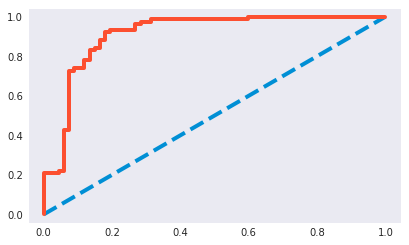

In [77]:
#Plotting the ROC curve for test model
#1. Extract Probability values for 1
probability_values_roc_ad_lr = model_ad_lr.predict_proba(X_test)[:,1]
#2. Calculate AUC
auc_roc_ad_lr = roc_auc_score(y_test,probability_values_roc_ad_lr)
print("AUC for LR:",auc_roc_ad_lr)
#3. Plot the Skill Line
plt.plot([0,1],[0,1], linestyle='--')
#4. Plot ROC Curve
fpr_ad_lr,tpr_ad_lr,thres_ad_lr= roc_curve(y_test,probability_values_roc_ad_lr)
gmean_ad_lr = np.sqrt(tpr_ad_lr * (1-fpr_ad_lr))
ix_ad_lr = np.argmax(gmean_ad_lr)
plt.plot(fpr_ad_lr,tpr_ad_lr)

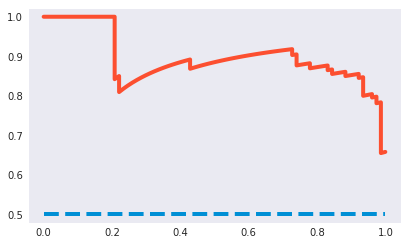

In [78]:
#Plotting the PR curve for test model
#1. Extract Probability values for 1
probability_values_pr_ad_lr = model_ad_lr.predict_proba(X_test)[:,1]
#2. Calculate AUC
pr_ad_lr,re_ad_lr,th_ad_lr = precision_recall_curve(y_test,probability_values_pr_ad_lr)
auc_pr_ad_lr = auc(re_ad_lr,pr_ad_lr)
#3. Plot the Skill Line
plt.plot([0,1],[0.5,0.5], linestyle='--')
#4. Plot ROC Curve
plt.plot(re_ad_lr,pr_ad_lr)

## Observations:
* ADA-LR has more AUC than KNN. 
* KNN has more Accuracy than ADA-LR.
* KNN had lesser False Positives than ADA-LR.
* Our target are Precision of 0 and Recall of 1. As we do not want to miss any diabetic patient. So lesser the False Positive better the Algorithim or Model
* As our data is imbalanced we are checking PR AUC curve also and we found out that the line is not touching the skill line. Hence both ADA-LR and KNN Model are accepted for final voting.

## Adaptive Boosting on SVM

In [79]:
#Finding the Train and Test Data which will create Generalized model
algorithmSVM = SVC(kernel="linear", class_weight='balanced', probability=True)

for i in range(1,101):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.15,
                                                    random_state=i)
    model_svm = AdaBoostClassifier(base_estimator=algorithmSVM,algorithm='SAMME',n_estimators=101)
    model_svm.fit(X_train,y_train)
    
    train_score=model_svm.score(X_train,y_train)
    test_score=model_svm.score(X_test,y_test)
    #print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))
    if (test_score > train_score) and (test_score > 0.78):
        print("Test: {}, Train: {}, RS: {}".format(test_score,train_score,i))

Test: 0.7847222222222222, Train: 0.7266009852216748, RS: 38


In [80]:
#Creating Adaboosting LR Generalized model using the Train and Test Data for Random State 38.
X_train,X_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.15,
                                                    random_state=38)
algorithmSVM = SVC(kernel="linear")
model_svm = AdaBoostClassifier(base_estimator=algorithmSVM,algorithm='SAMME')
model_svm.fit(X_train,y_train)
    
train_score=model_svm.score(X_train,y_train)
test_score=model_svm.score(X_test,y_test)
print("Test: {}, Train: {}".format(test_score,train_score))

Test: 0.7847222222222222, Train: 0.7241379310344828


In [81]:
# Prediction
svm_pred = model_svm.predict(X_test)

In [82]:
#Model Values
svm_model_vals = dict(accuracy=accuracy_score(y_test, svm_pred),
                    auc=roc_auc_score(y_test, svm_pred),
                    recall=recall_score(y_test, svm_pred),
                    precision=precision_score(y_test, svm_pred),
                    f1_score = f1_score(y_test, svm_pred),
                    )
print(classification_report(label, model_svm.predict(features)))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       478
           1       0.76      0.68      0.72       478

    accuracy                           0.73       956
   macro avg       0.74      0.73      0.73       956
weighted avg       0.74      0.73      0.73       956



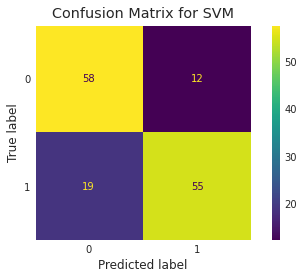

In [83]:
#Plot Confusion Matrix
plot_confusion_matrix(model_svm, X_test, y_test)  
plt.title("Confusion Matrix for SVM")
plt.show()

AUC for LR: 0.8426640926640926


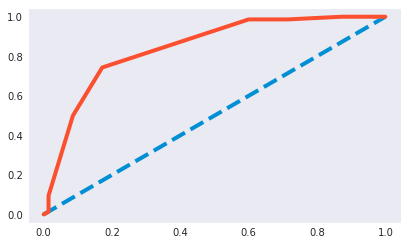

In [84]:
#Plotting the ROC curve for test model
#1. Extract Probability values for 1
probability_values_roc_svm = model_svm.predict_proba(X_test)[:,1]
#2. Calculate AUC
auc_roc_svm = roc_auc_score(y_test,probability_values_roc_svm)
print("AUC for LR:",auc_roc_svm)
#3. Plot the Skill Line
plt.plot([0,1],[0,1], linestyle='--')
#4. Plot ROC Curve
fpr_svm,tpr_svm,thres_svm= roc_curve(y_test,probability_values_roc_svm)
gmean_svm = np.sqrt(tpr_svm * (1-fpr_svm))
ix_svm = np.argmax(gmean_svm)
plt.plot(fpr_svm,tpr_svm)

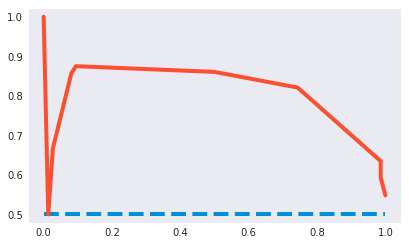

In [85]:
#Plotting the PR curve for test model
#1. Extract Probability values for 1
probability_values_pr_svm = model_svm.predict_proba(X_test)[:,1]
#2. Calculate AUC
pr_svm,re_svm,th_svm = precision_recall_curve(y_test,probability_values_pr_svm)
auc_pr_svm = auc(re_svm,pr_svm)
#3. Plot the Skill Line
plt.plot([0,1],[0.5,0.5], linestyle='--')
#4. Plot ROC Curve
plt.plot(re_svm,pr_svm)

## Observations:
* SVM has more AUC than KNN. 
* KNN has more Accuracy than SVM.
* KNN had lesser False Positives than SVM.
* Our target are Precision of 0 and Recall of 1. As we do not want to miss any diabetic patient. So lesser the False Positive better the Algorithim or Model
* As our data is imbalanced we are checking PR AUC curve also and we found out that the line is not touching the skill line.
* SVM has maximum FP value.Compared to all other model

## Plotting Classification Report by analyzing sensitivity, specificity, AUC (ROC curve).

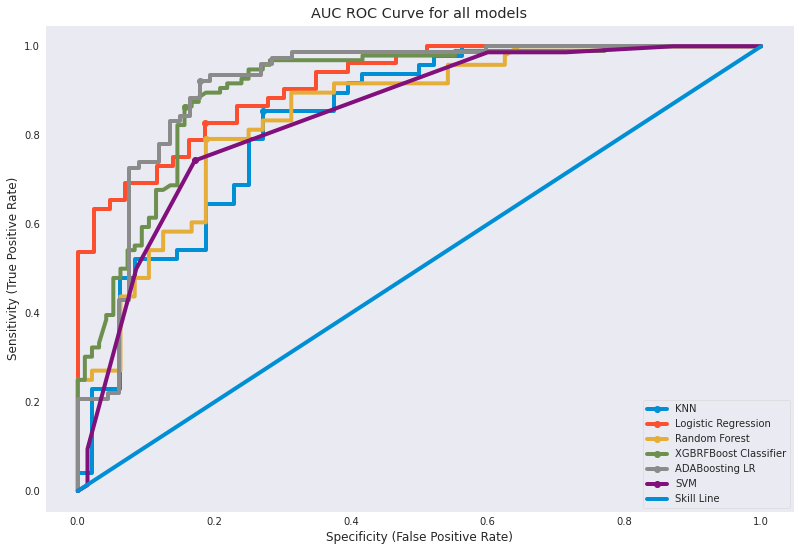

In [86]:
plt.subplots(figsize=(12,9))
plt.plot(fpr_knn, tpr_knn, marker='o', markevery=[ix_knn])
plt.plot(fpr_lr, tpr_lr, marker='o', markevery=[ix_lr])
plt.plot(fpr_rf, tpr_rf, marker='o', markevery=[ix_rf])
plt.plot(fpr_xgbrf, tpr_xgbrf, marker='o', markevery=[ix_xgbrf])
plt.plot(fpr_ad_lr, tpr_ad_lr, marker='o', markevery=[ix_ad_lr])
plt.plot(fpr_svm, tpr_svm, marker='o', markevery=[ix_svm])
plt.plot([0,1], [0,1])
plt.xlabel('Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('AUC ROC Curve for all models')
plt.legend(['KNN','Logistic Regression', 'Random Forest', 'XGBRFBoost Classifier', 'ADABoosting LR', 'SVM', 'Skill Line'])
plt.show()

## Observation:
* All the classification models are above the Skill Line.
* RandomForest has more AUC and Accuracy than KNN. But we will consider KNN because KNN had 7 False Positives while Random Forest has more False Positives.
* Our goal was to have lesser False Positive as we do not want to miss a Diabetic Patient.
* Hence the model which has less False Positive can be considered for the Deployment.

## Data Reporting:
Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

* Pie chart to describe the diabetic or non-diabetic population
* Scatter charts between relevant variables to analyze the relationships
* Histogram or frequency charts to analyze the distribution of the data
* Heatmap of correlation analysis among the relevant variables
* Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

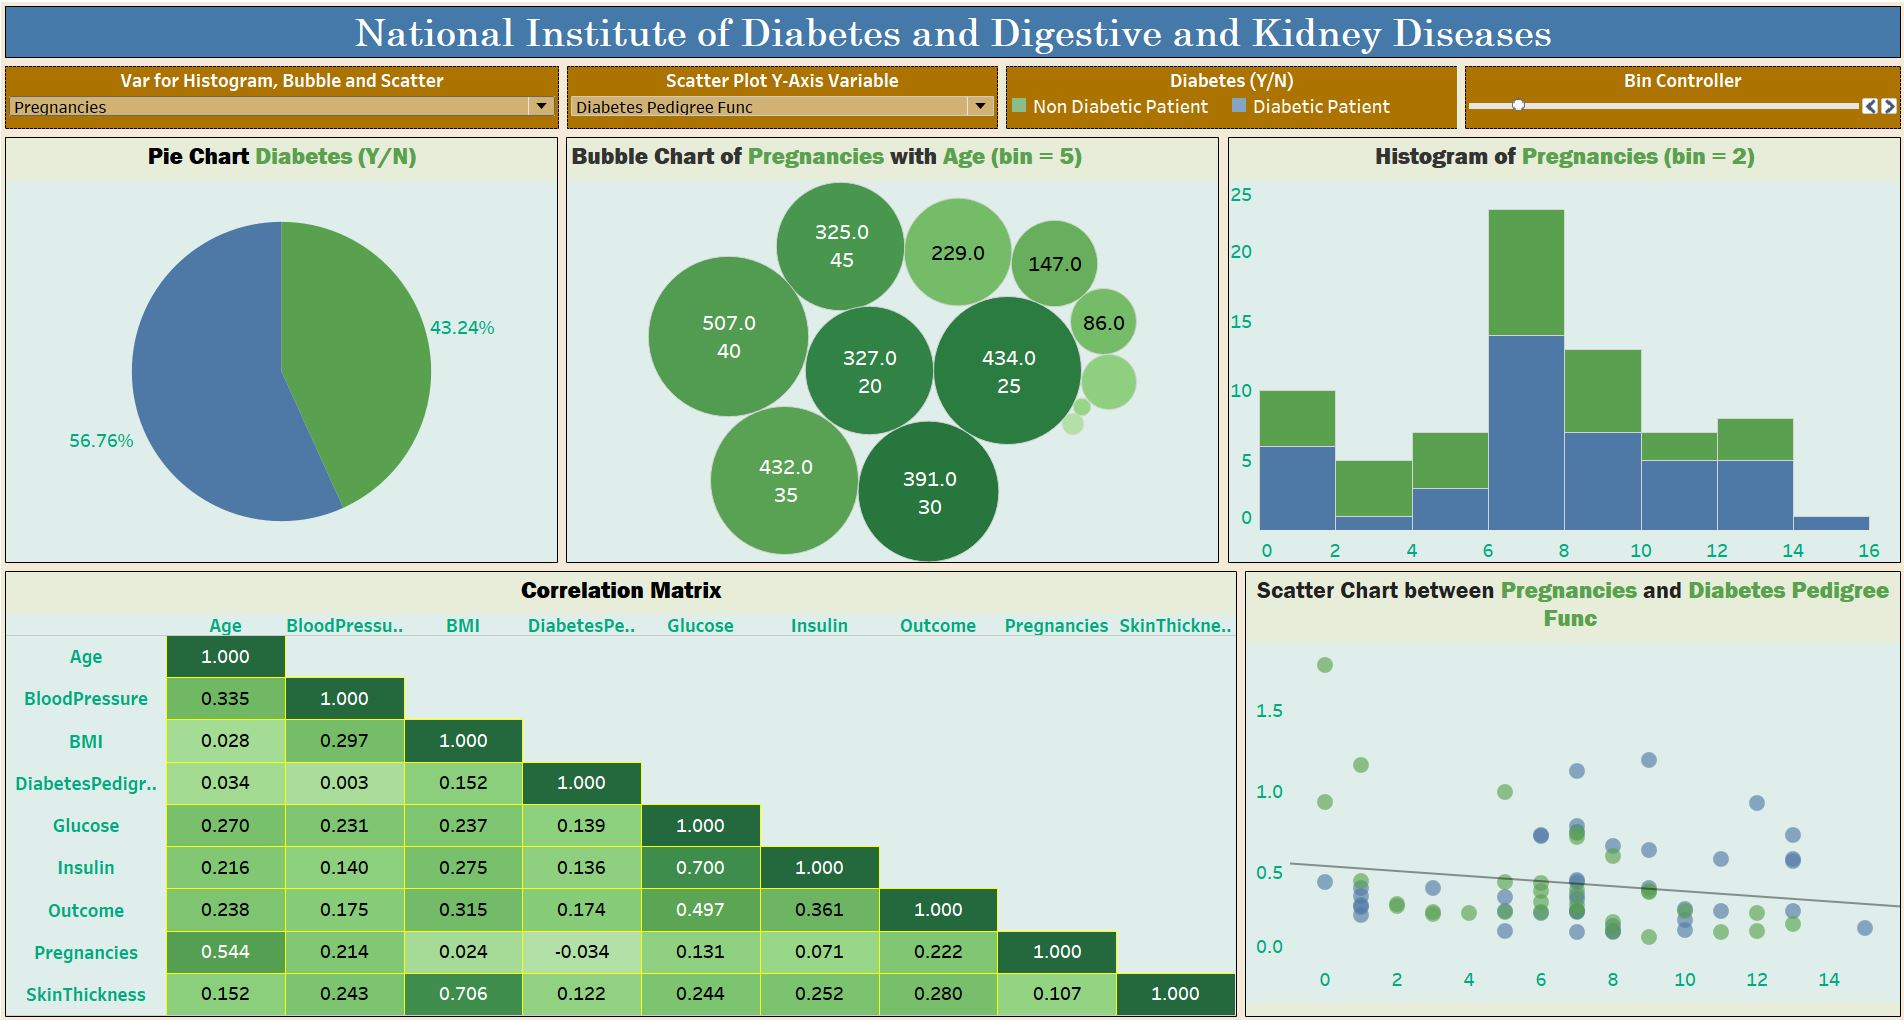